# CODSOFT INTERNSHIP

# TASK 5 # CREDIT CARD FRAUD DETECTION

OBJECTIVE :- Build a machine learning model to identify fraudulent credit card
transactions.

In [4]:
!pip install opendatasets

In [5]:
import opendatasets as od
dataset = 'https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud'
od.download(dataset)

Skipping, found downloaded files in ".\creditcardfraud" (use force=True to force download)


In [6]:
import os

In [7]:
data = '.\creditcardfraud'

In [8]:
os.listdir(data)

['.ipynb_checkpoints']

In [9]:
import pandas as pd

In [11]:
datas = pd.read_csv('creditcard.csv')
datas

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


The dataset contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.



In [12]:
datas.shape

(284807, 31)

In [13]:
datas.info()
datas.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
datas['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Class 0 denotes the normal transaction
Class 1 denotes the Fraud transaction
So from the datase it is clear that there are 284315 normal transaction and 492 fraud transaction

In [15]:
normal = datas[datas.Class == 0]
fraud = datas[datas.Class == 1]
normal,fraud

(            Time         V1         V2        V3        V4        V5  \
 0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
 1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
 2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
 3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
 4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
 ...          ...        ...        ...       ...       ...       ...   
 284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
 284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
 284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
 284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
 284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   
 
               V6        V7        V8        V9  ...       V21       V22  \
 0       0.462388  0.239599  0.098698  0.36378

In [16]:
normal.shape,fraud.shape

((284315, 31), (492, 31))

In [17]:
normal['Amount'].describe(),fraud['Amount'].describe()

(count    284315.000000
 mean         88.291022
 std         250.105092
 min           0.000000
 25%           5.650000
 50%          22.000000
 75%          77.050000
 max       25691.160000
 Name: Amount, dtype: float64,
 count     492.000000
 mean      122.211321
 std       256.683288
 min         0.000000
 25%         1.000000
 50%         9.250000
 75%       105.890000
 max      2125.870000
 Name: Amount, dtype: float64)

In [18]:
datas.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Since the normal transcation in large ,so we are taking some samples equal to the fraud transaction
ie,n=492

In [19]:
normal_sample=normal.sample(n=492)
normal_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
282354,170840.0,-0.998843,1.016935,-0.554725,-0.516017,0.121835,-0.895762,1.300517,0.099375,-0.727752,...,0.419353,1.087674,-0.248756,0.033837,-0.053853,-0.216410,-0.025687,0.066764,150.06,0
180292,124471.0,-1.058976,1.799628,-1.741564,-1.241689,0.721709,-1.309185,0.892630,0.476091,-0.756276,...,0.340029,0.936725,-0.187571,-0.435259,-0.173081,0.094246,0.114973,0.185056,0.77,0
71733,54424.0,-0.483868,1.067880,1.685353,-0.012133,0.018787,-0.577555,0.726229,-0.006481,-0.571302,...,-0.164658,-0.340765,0.049484,0.406802,-0.275418,0.077237,0.286646,0.123291,8.99,0
256288,157624.0,2.043762,-0.807591,-1.406683,-0.598088,-0.355011,-0.614031,-0.253748,-0.268127,-0.964316,...,-0.057796,0.295700,0.008081,-0.406825,-0.056338,0.796131,-0.068686,-0.066106,69.95,0
29930,35701.0,0.405688,-0.916547,-0.046096,1.512634,-0.450948,-0.233924,0.664721,-0.226349,-0.225652,...,0.356568,0.239390,-0.450691,0.140429,0.487508,-0.298292,-0.035231,0.091821,411.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164695,116917.0,-0.558638,-0.401784,0.350392,-2.141855,0.146289,0.067725,0.884019,-0.200513,-0.693975,...,0.315618,0.666653,0.047676,-0.048238,0.143711,-0.209606,-0.102606,-0.039158,199.00,0
56191,47310.0,-1.260913,0.861277,1.008866,-0.028617,0.703008,0.745803,0.340497,0.804579,-0.540656,...,-0.024149,-0.250687,-0.415412,-1.189389,0.784416,-0.337076,-0.086170,-0.056652,26.82,0
191970,129480.0,2.125595,0.035545,-2.317812,0.034462,1.055241,-0.395546,0.540030,-0.263171,-0.099312,...,0.110008,0.477656,-0.081962,0.120733,0.445318,0.704194,-0.117798,-0.094981,0.76,0
148835,90242.0,2.043269,-0.034406,-2.813734,-0.374783,2.683855,3.189675,-0.509643,0.703848,1.644861,...,-0.502836,-1.183176,0.375254,0.543800,-0.287679,0.181072,-0.065942,-0.049200,1.98,0


In [20]:
newdata = pd.concat([normal_sample,fraud],axis=0)
newdata

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
282354,170840.0,-0.998843,1.016935,-0.554725,-0.516017,0.121835,-0.895762,1.300517,0.099375,-0.727752,...,0.419353,1.087674,-0.248756,0.033837,-0.053853,-0.216410,-0.025687,0.066764,150.06,0
180292,124471.0,-1.058976,1.799628,-1.741564,-1.241689,0.721709,-1.309185,0.892630,0.476091,-0.756276,...,0.340029,0.936725,-0.187571,-0.435259,-0.173081,0.094246,0.114973,0.185056,0.77,0
71733,54424.0,-0.483868,1.067880,1.685353,-0.012133,0.018787,-0.577555,0.726229,-0.006481,-0.571302,...,-0.164658,-0.340765,0.049484,0.406802,-0.275418,0.077237,0.286646,0.123291,8.99,0
256288,157624.0,2.043762,-0.807591,-1.406683,-0.598088,-0.355011,-0.614031,-0.253748,-0.268127,-0.964316,...,-0.057796,0.295700,0.008081,-0.406825,-0.056338,0.796131,-0.068686,-0.066106,69.95,0
29930,35701.0,0.405688,-0.916547,-0.046096,1.512634,-0.450948,-0.233924,0.664721,-0.226349,-0.225652,...,0.356568,0.239390,-0.450691,0.140429,0.487508,-0.298292,-0.035231,0.091821,411.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [21]:
newdata.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96877.636179,-0.016451,0.085948,0.073344,-0.035677,0.002408,0.026230,-0.034434,-0.116059,-0.011190,...,0.011522,0.078685,0.019941,-0.001078,0.017281,0.019562,-0.004813,0.000739,-0.007234,82.168313
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Class', ylabel='count'>

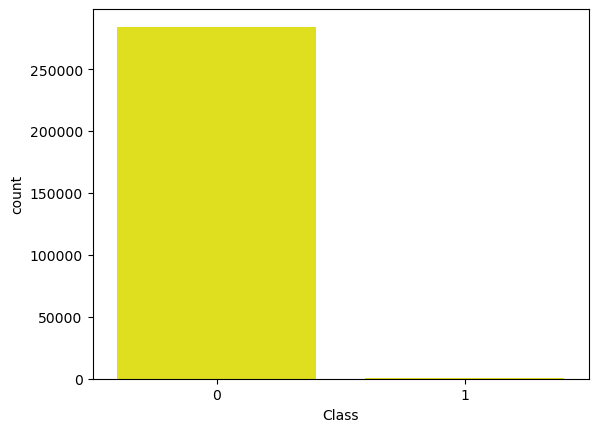

In [23]:
sns.countplot(x = 'Class',data = datas,color = 'Yellow')

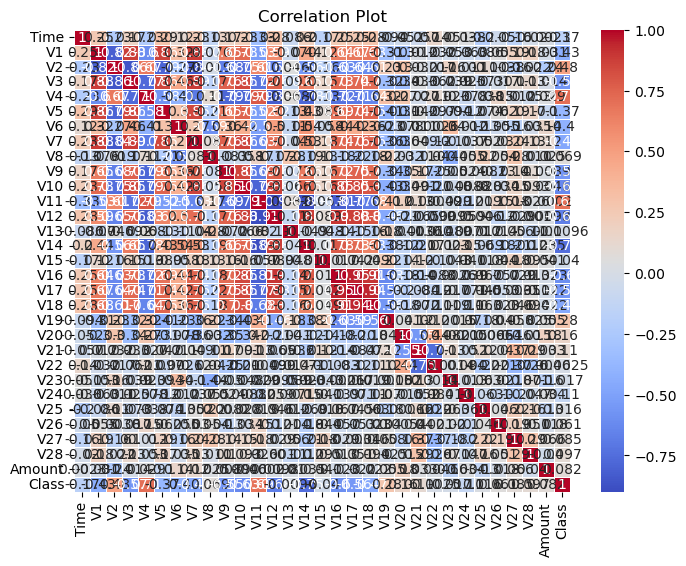

In [24]:
# Correlation Plot
correlation_matrix = newdata.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

In [34]:
dataset_corr_class=datas.corr()['Class'].to_frame()

<Axes: xlabel='Class'>

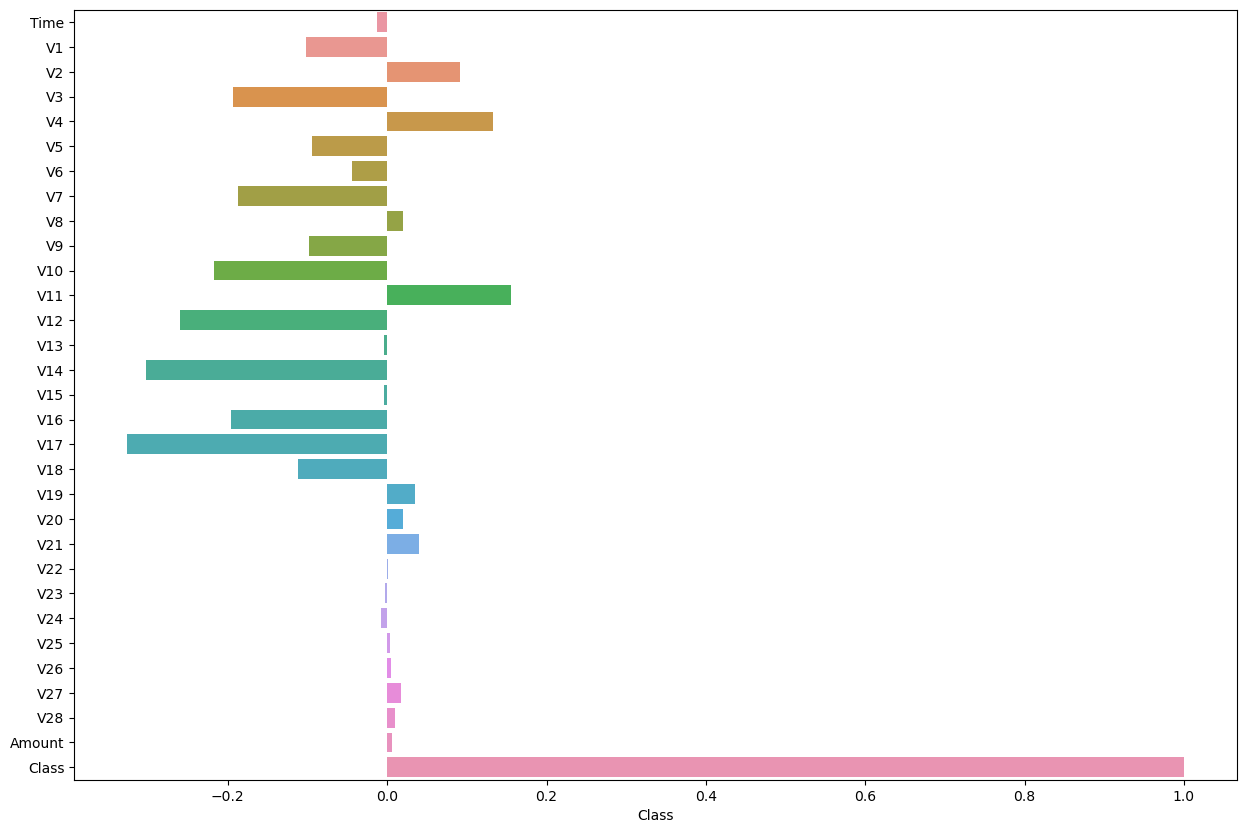

In [35]:
plt.figure(figsize=(15,10))
sns.barplot(data=dataset_corr_class,y=dataset_corr_class.index,x='Class')

In [35]:
X = newdata.drop('Class', axis = 1)
Y = newdata['Class']
X,Y

(            Time        V1        V2        V3        V4        V5        V6  \
 1593      1240.0 -1.441214 -0.078604  0.449898 -1.900352  0.283061 -2.074269   
 237203  149139.0  2.129035 -0.721980 -1.360062 -0.700896 -0.506389 -0.517045   
 44917    42137.0  0.865336 -0.766474  0.354906  0.221594 -0.861259 -0.365324   
 168611  119306.0 -0.322873  0.089971  0.895520  0.974123  0.639174  1.012430   
 253960  156511.0  0.003597 -0.233999 -0.163007 -2.873089  0.504062 -0.140503   
 ...          ...       ...       ...       ...       ...       ...       ...   
 279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
 280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
 280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
 281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
 281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   
 
               V7        V

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
 X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)
X.shape, X_train.shape, X_test.shape,Y_test

((984, 30),
 (688, 30),
 (296, 30),
 53794     1
 157871    1
 39183     1
 124036    1
 213307    0
          ..
 44791     0
 203700    1
 107637    1
 154184    0
 8617      1
 Name: Class, Length: 296, dtype: int64)

In [43]:
sc = StandardScaler()
X_normalized = sc.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size = 0.4, random_state = 8)
X.shape, X_train.shape, X_test.shape,Y_test

NameError: name 'StandardScaler' is not defined

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() 
model.fit(X_train, Y_train)

LogisticRegression()

In [39]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9418604651162791


In [40]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9391891891891891


In [86]:
rfc_Y_predict = rfc.predict(X_test)
accuracy_1 = accuracy_score(Y_test, rfc_Y_predict)
print("Accuracy is: ", accuracy_1)

Accuracy is:  0.9365482233502538
